<a href="https://colab.research.google.com/github/sakshi436/Customer-Segmentation/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

## Importing Required Libraries

In [ ]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN

In [ ]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [ ]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1434,3388,1967,Graduation,Divorced,70844.0,1,1,30-10-2013,16,129,...,7,0,0,0,0,0,0,3,11,0
748,2281,1970,Graduation,Single,33697.0,1,0,15-09-2013,34,4,...,7,1,0,0,0,0,0,3,11,0
1207,3068,1990,Graduation,Married,18351.0,0,0,29-10-2013,1,1,...,7,0,0,0,0,0,0,3,11,0
2058,10061,1950,Graduation,Married,59462.0,0,1,05-01-2013,29,724,...,7,0,0,0,0,0,0,3,11,0
1220,10395,1986,Basic,Single,8940.0,1,0,22-08-2012,25,1,...,8,0,0,0,0,0,0,3,11,0


# Basic Information about Dataset

In [ ]:
df['Income'].min()

1730.0

In [ ]:
df['Income'].max()

666666.0

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.ndim

2

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

# Feature Engineering

Extracting age from the year of birth

In [ ]:
df['age']=df['Year_Birth'].apply(lambda x: 2024-x)

Calculating total expenditure of the customer

In [ ]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Extracting month in which customer has made any purchase.

In [ ]:
df['Month'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.month

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


This means we have data of customers' shopping habits of nearly about two years.

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

Creating features like living status, number of children and family size to know more about the data.

In [ ]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [ ]:
df.drop(columns=['Marital_Status','Kidhome','Teenhome','Dt_Customer','Z_CostContact', 'Z_Revenue','ID','Year_Birth'],axis=1,inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
MntWines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
MntFruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
MntMeatProducts,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
MntFishProducts,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
MntSweetProducts,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
MntGoldProds,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02
NumDealsPurchases,2216.0,2.323556e+00,1.923716e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.500000e+01
NumWebPurchases,2216.0,4.085289e+00,2.740951e+00,0.0,2.000000e+00,4.000000e+00,6.000000e+00,2.700000e+01


The above tabulated five number summary tells us that:
1. There is no missing value left as we have already dealt with it.
2. Family size is in the discrete range of [0,5].
3. There is a huge difference between mean income and median income.
4. There is wide range of customers from young adult people of 28 years to senior citizen of 131 years.


# Data Visualisation

<Axes: >

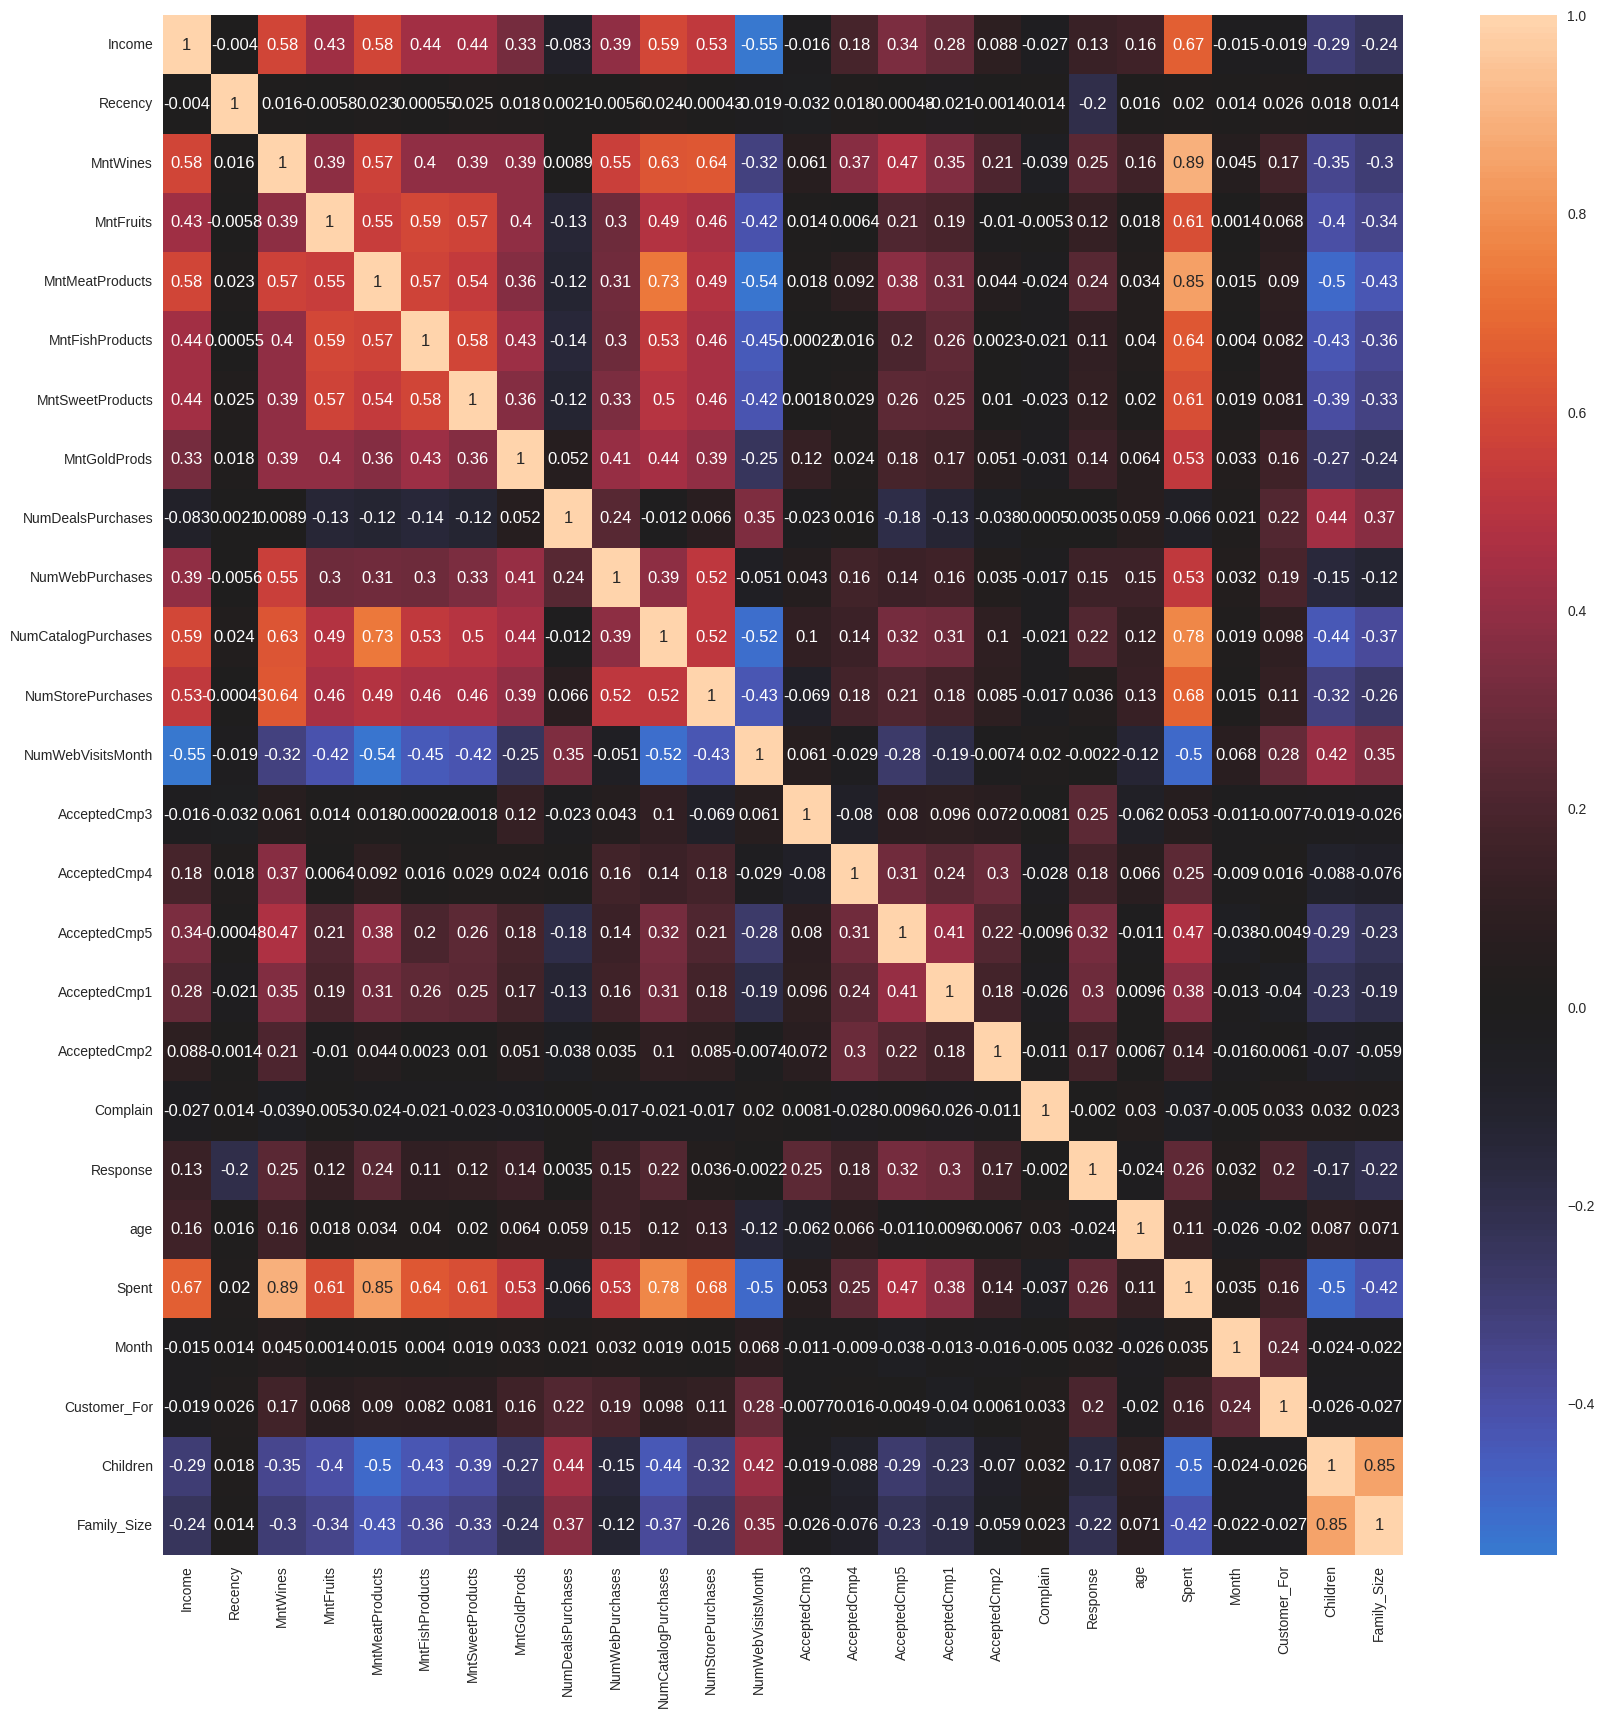

In [ ]:
numerical_cols = ['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'Spent', 'Month',
       'Customer_For', 'Children', 'Family_Size']
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_cols].corr(),annot=True, center=0)

1. Income is strong correlated with MntWines, MntMeatProducts, NumCatalogPurchases and Spent. This means that AAs Income increases people's expenditure increases and they spend money on Wines, Meat Products and Catalog Purchases.
2. NumStorePurchases is strongly correlated with Spent. People used to make more spent their money on more number of purchases from store.
3. As number of children increases, purchase of Meat Products and expenditure decreases.
4. Spent and NumWebVisitsMonth are negatively correlated with each other. One goes up with another goes down.
5. Also each variable is perfectly correlated with itself.


Text(0.5, 1.0, 'Family Size')

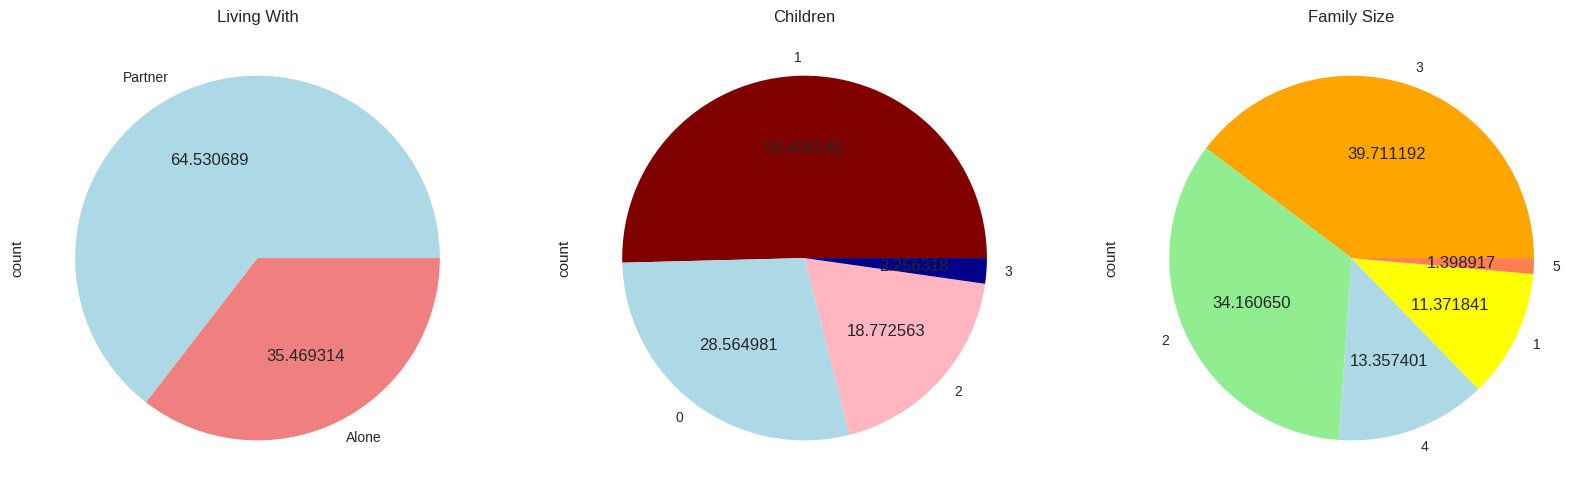

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(131)
df['Living_With'].value_counts().plot(kind="pie",autopct="%2f",colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Living With")
plt.subplot(132)
df['Children'].value_counts().plot(kind="pie",autopct="%2f",colors=['maroon', 'lightblue', 'lightpink','darkblue'])
plt.title("Children")
plt.subplot(133)
df['Family_Size'].value_counts().plot(kind="pie",autopct="%2f",colors=['orange', 'lightgreen', 'lightblue','yellow','coral'])
plt.title("Family Size")

We can infer from the above that:
1. People living with their partner are at majority while alone people have 35% proportion in the dataset.
2.Half of the people have single child and nearly 2% have three children at maximum.
3. There are very few large families of five size people while there is good proportion for three-member sized families.


Text(0, 0.5, 'Number of Customers')

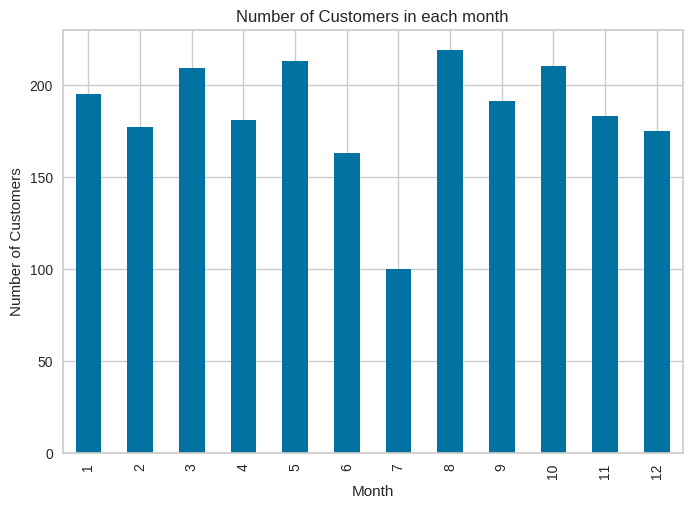

In [ ]:
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Customers in each month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

The customers are least likely to come in seventh month i.e. July while customers buy things mostly in the month of March, May, August and October.  

<ipython-input-207-1f1e3b87aaff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])
<ipython-input-207-1f1e3b87aaff>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Recency'])
<ipython-input-207-1f1e3b87aaff>:9: UserWarning: 

`distplot` is a deprecated function and will be remo

Text(0.5, 1.0, 'Response')

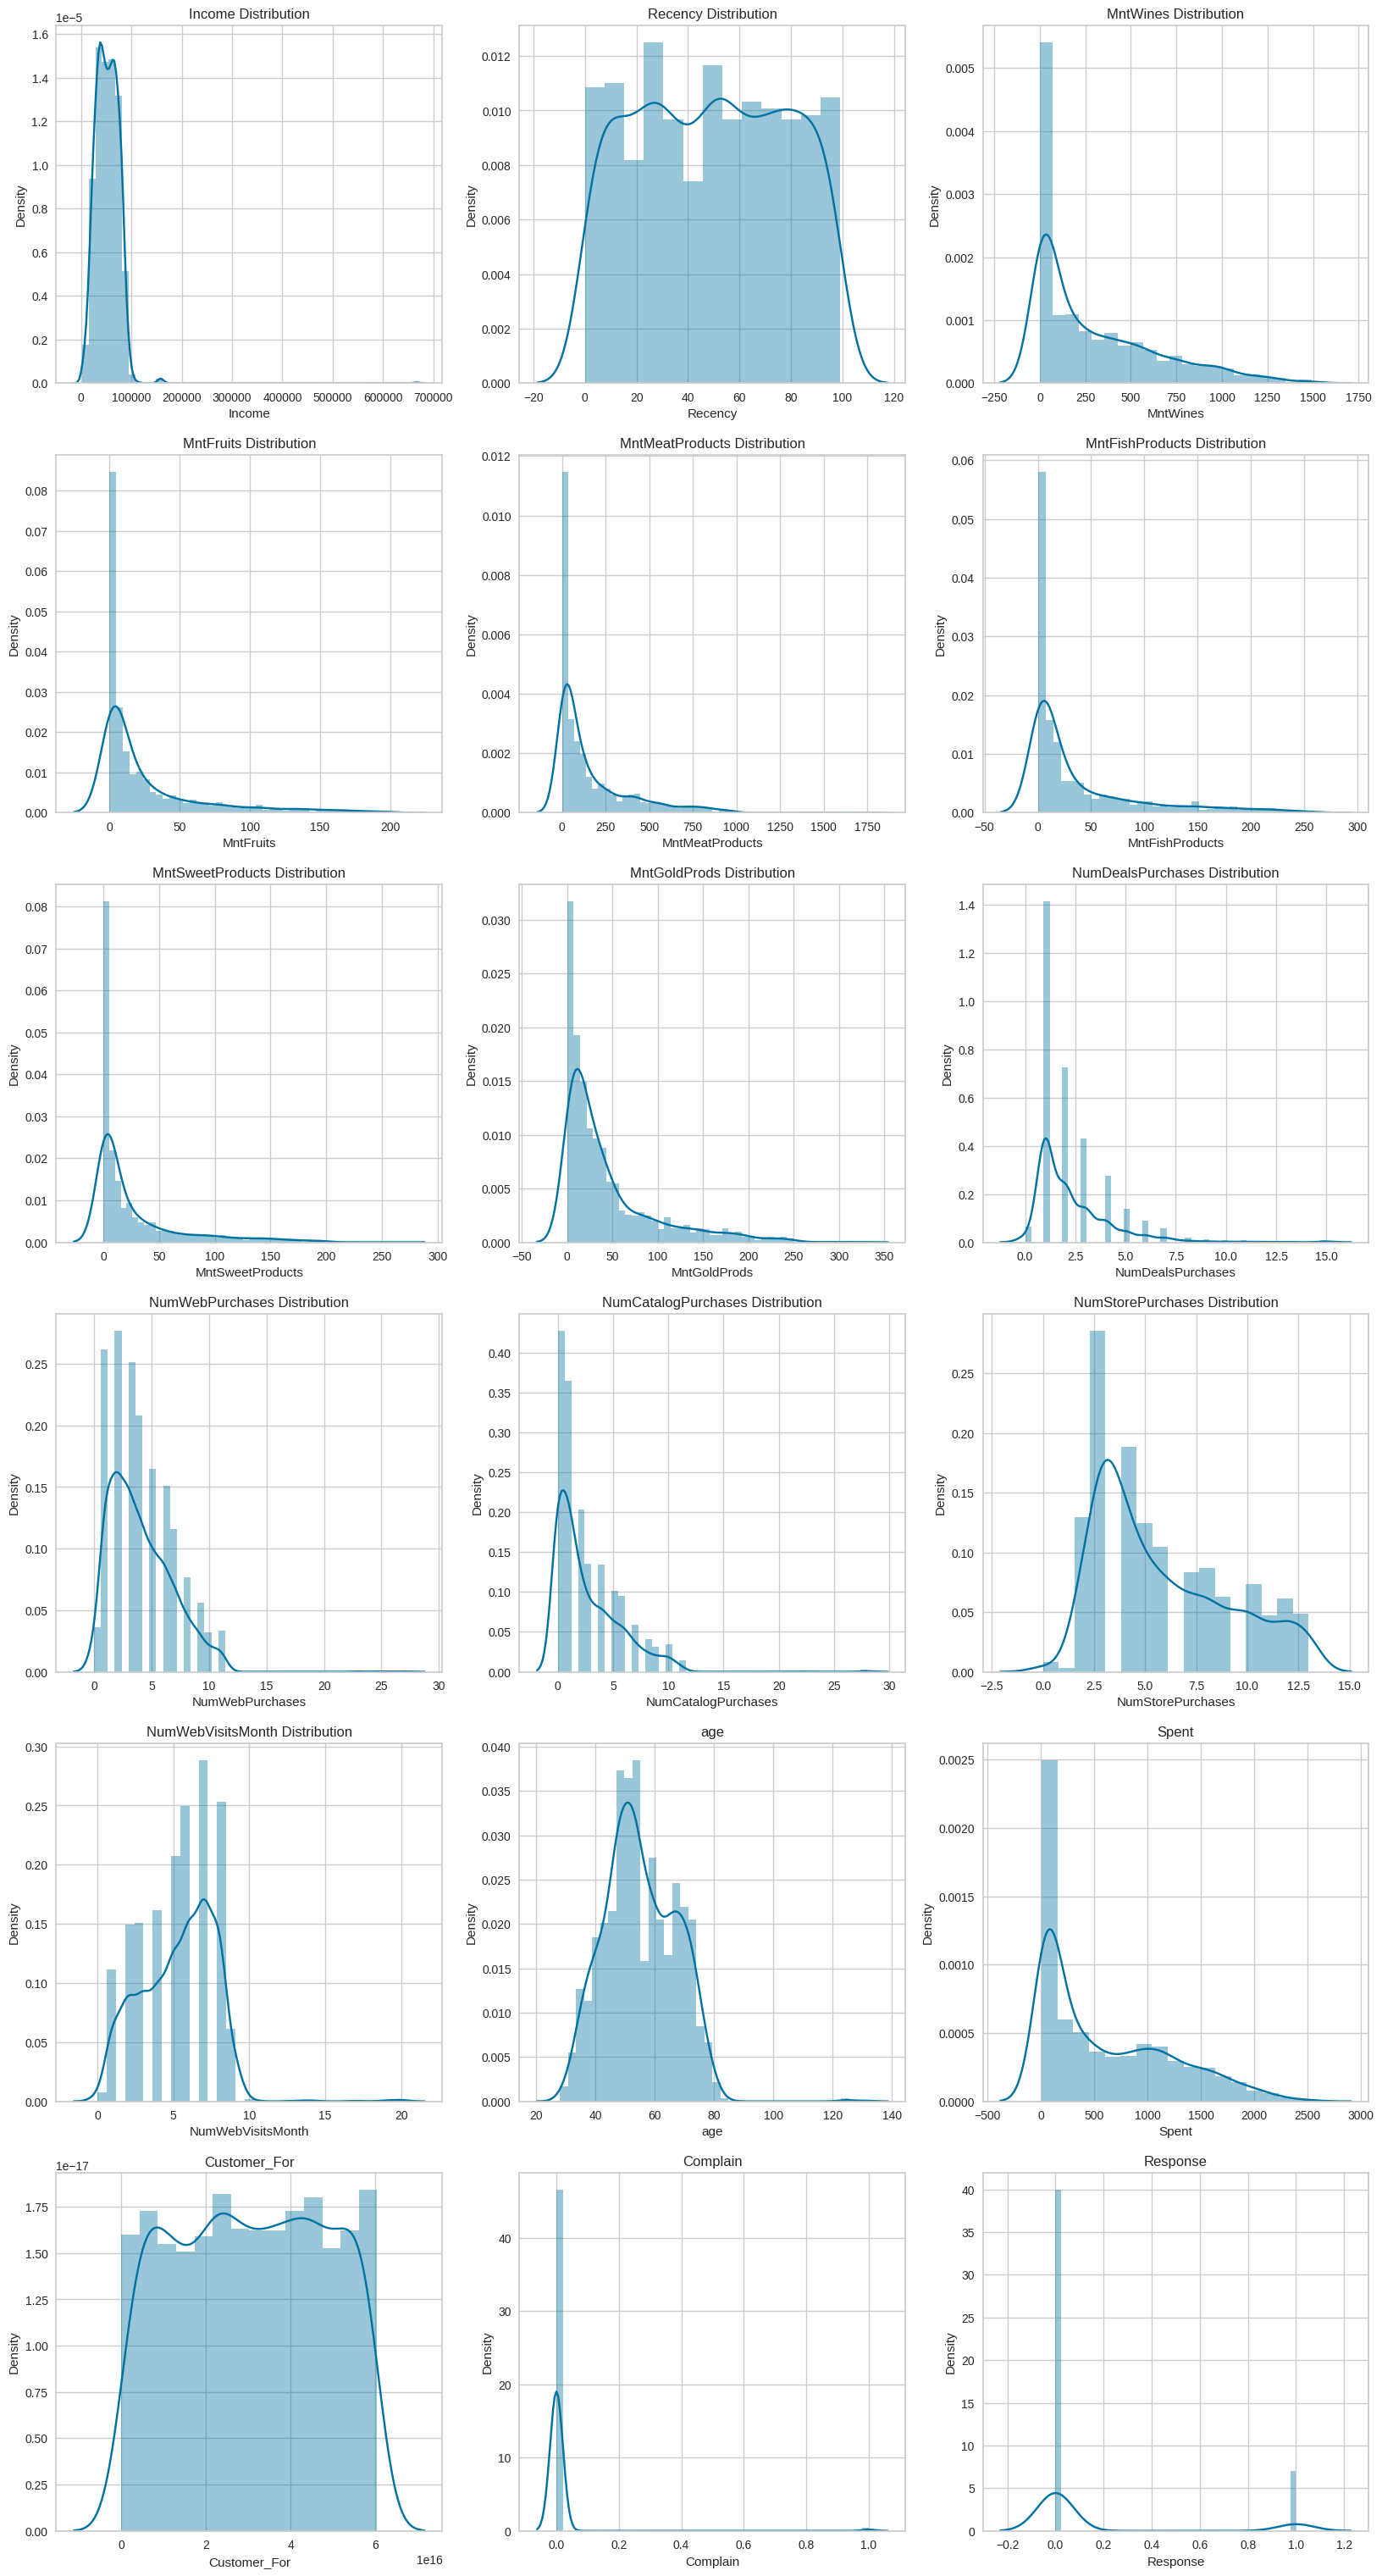

In [ ]:
plt.figure(figsize=(20,45))
plt.subplot(731)
sns.distplot(df['Income'])
plt.title("Income Distribution")
plt.subplot(732)
sns.distplot(df['Recency'])
plt.title("Recency Distribution")
plt.subplot(733)
sns.distplot(df['MntWines'])
plt.title("MntWines Distribution")
plt.subplot(734)
sns.distplot(df['MntFruits'])
plt.title("MntFruits Distribution")
plt.subplot(735)
sns.distplot(df['MntMeatProducts'])
plt.title("MntMeatProducts Distribution")
plt.subplot(736)
sns.distplot(df['MntFishProducts'])
plt.title("MntFishProducts Distribution")
plt.subplot(737)
sns.distplot(df['MntSweetProducts'])
plt.title("MntSweetProducts Distribution")
plt.subplot(738)
sns.distplot(df['MntGoldProds'])
plt.title("MntGoldProds Distribution")
plt.subplot(739)
sns.distplot(df['NumDealsPurchases'])
plt.title("NumDealsPurchases Distribution")
plt.subplot(7,3,10)
sns.distplot(df['NumWebPurchases'])
plt.title("NumWebPurchases Distribution")
plt.subplot(7,3,11)
sns.distplot(df['NumCatalogPurchases'])
plt.title("NumCatalogPurchases Distribution")
plt.subplot(7,3,12)
sns.distplot(df['NumStorePurchases'])
plt.title("NumStorePurchases Distribution")
plt.subplot(7,3,13)
sns.distplot(df['NumWebVisitsMonth'])
plt.title("NumWebVisitsMonth Distribution")
plt.subplot(7,3,14)
sns.distplot(df['age'])
plt.title('age')
plt.subplot(7,3,15)
sns.distplot(df['Spent'])
plt.title('Spent')
plt.subplot(7,3,16)
sns.distplot(df['Customer_For'])
plt.title('Customer_For')
plt.subplot(7,3,17)
sns.distplot(df['Complain'])
plt.title('Complain')
plt.subplot(7,3,18)
sns.distplot(df['Response'])
plt.title('Response')

From above distribution plots, we can see that:
1. Income is normally distributes and is in the range between 0-100000 with some outliers presented.
2. Recency is normally distributed with multimodals and has data points from 0-100.
3. Wines, Fruits, Meat, Fish, Sweet and Gold Products have positive skewed data.
4. Age has bimodal normal distribution with high density if the people in the age of 40-60 years.
5. All types of Purchases also have positive skewed data.

Text(0.5, 1.0, 'Number of web visits in a month')

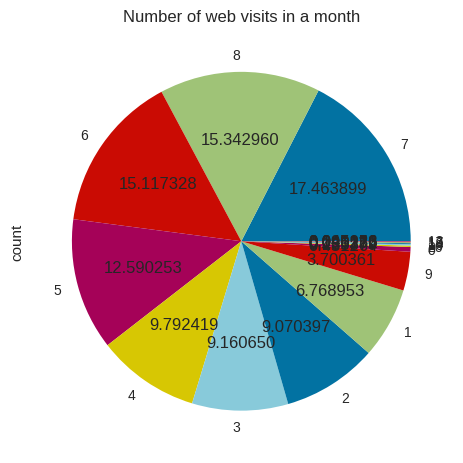

In [ ]:
df['NumWebVisitsMonth'].value_counts().plot(kind="pie",autopct="%2f")
plt.title("Number of web visits in a month")

Customers who visits website 20 times in a month has less population; we can say that a customer will  mostly visit the website 6-8 times in a month

Text(0.5, 1.0, 'Number of store purchases')

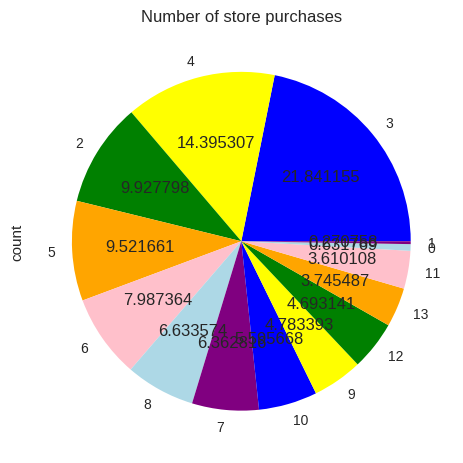

In [ ]:
df['NumStorePurchases'].value_counts().plot(kind="pie",autopct="%2f",colors=['blue','yellow','green','orange','pink','lightblue','purple'])
plt.title("Number of store purchases")

Most of the customers will made their purchases three times while zero and one time purchasers would be insignificant in numbers.

<ipython-input-210-50fc7a01823f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Complain'].value_counts(),palette=['purple','blue'])


Text(0.5, 1.0, 'Complain')

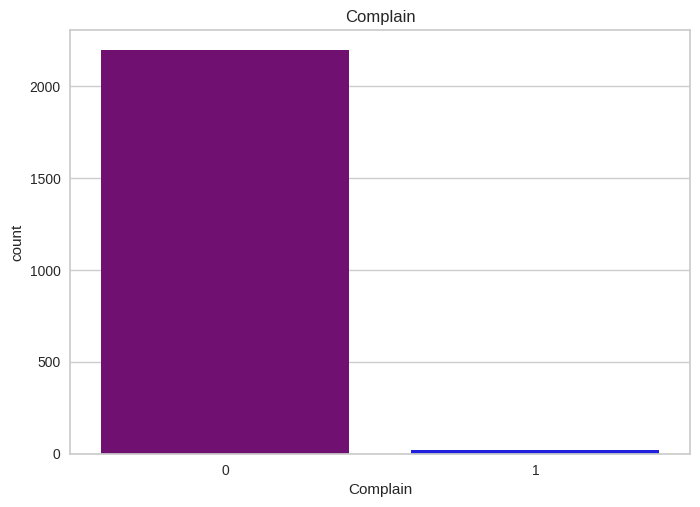

In [ ]:
sns.barplot(df['Complain'].value_counts(),palette=['purple','blue'])
plt.title("Complain")

It is good to infer that customers in majority do not complain although there is minor presence of the customers who complain.

<ipython-input-211-e839f68f377b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Response'].value_counts(),palette=['green','yellow'])


Text(0.5, 1.0, 'Response')

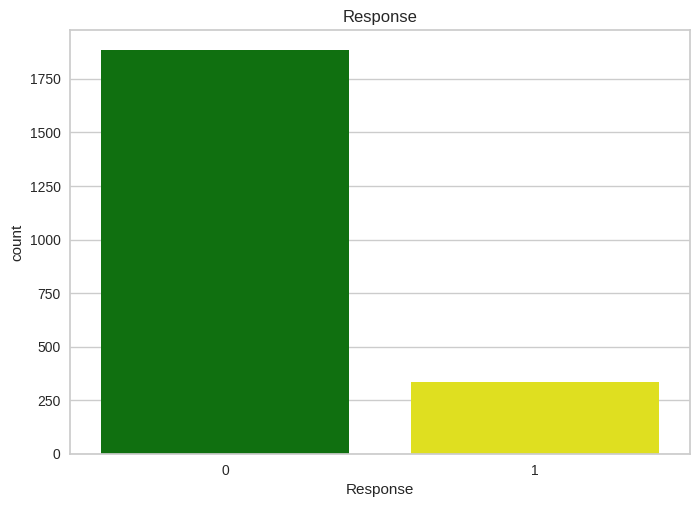

In [ ]:
sns.barplot(df['Response'].value_counts(),palette=['green','yellow'])
plt.title("Response")

Their is no response to many of the customer's request and very few people get responded.

Text(0.5, 1.0, 'Number of web purchases')

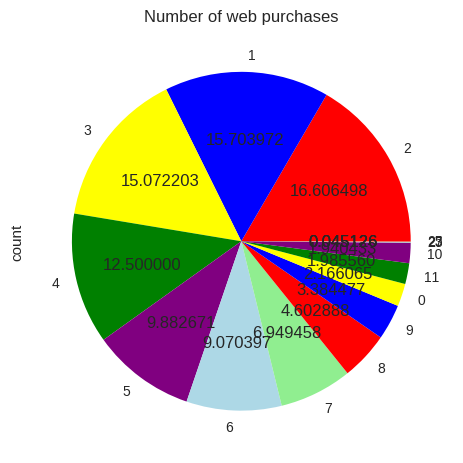

In [ ]:
df['NumWebPurchases'].value_counts().plot(kind="pie",autopct="%2f",colors=['red','blue','yellow','green','purple','lightblue','lightgreen'])
plt.title("Number of web purchases")

Customers make maximum of 23 purchases from web but the number is very less i.e. 0.045% while around customers have made one and three purchases i.e. around 15%.

<Axes: ylabel='Education'>

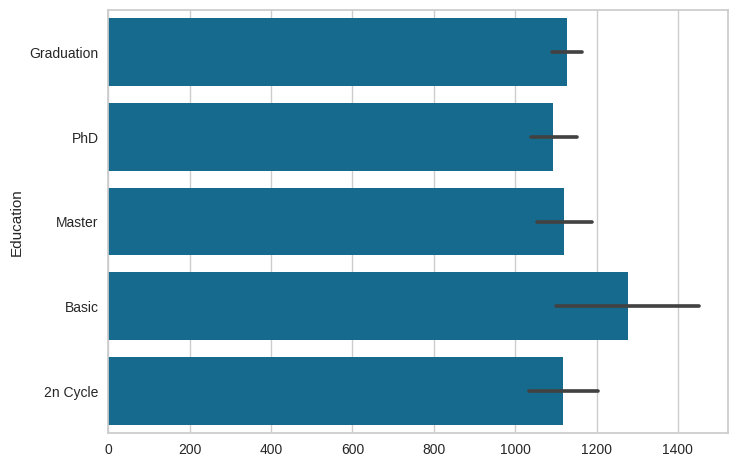

In [ ]:
sns.barplot(df['Education'])

Every customer is educated with some level of education.
Order of the education type who is the customer as well:
Basic>Graduation>Masters,2nCycle>Phd

<ipython-input-214-c3b202600681>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['MntWines'],y=df['Living_With'],palette='inferno')
<ipython-input-214-c3b202600681>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['MntWines'],y=df["Education"],palette='cool')


<Axes: xlabel='MntWines', ylabel='Education'>

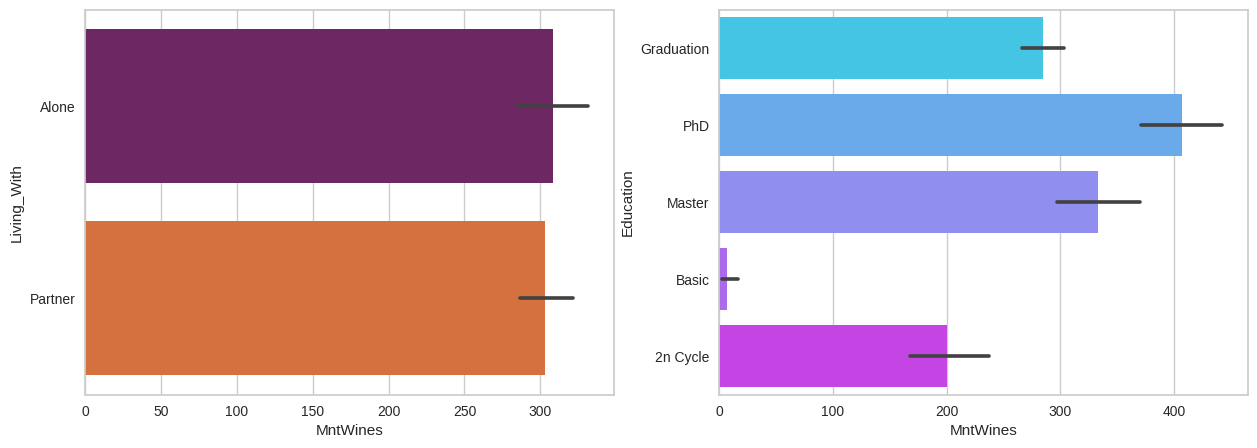

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=df['MntWines'],y=df['Living_With'],palette='inferno')
plt.subplot(122)
sns.barplot(x=df['MntWines'],y=df["Education"],palette='cool')

1. Widow people have bought wines at most with least number of people who are alone.

2. People with basic education buys the less wine and Phd students buys the most wine.

<ipython-input-215-6be3e85eaa58>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Income'],y=df["Spent"],palette='Set2')


<Axes: xlabel='Income', ylabel='Spent'>

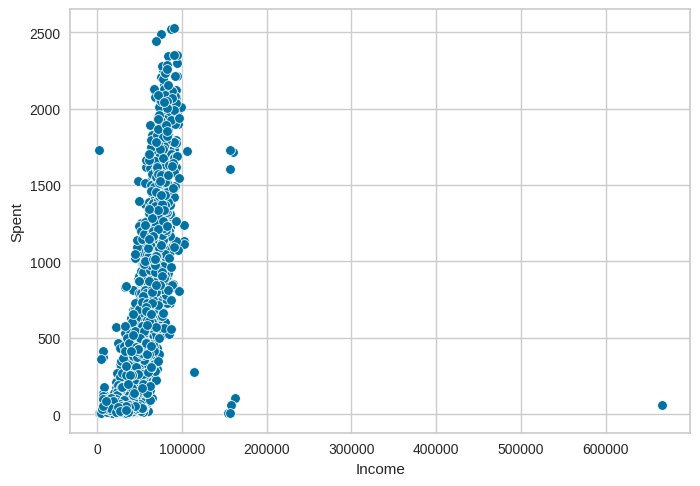

In [ ]:
sns.scatterplot(x=df['Income'],y=df["Spent"],palette='Set2')

As income also increases expenditure also increases and there is an outlier with 66000 as the income  but most of the incoe is concentrated betwenn 0-100000.

In [ ]:
cols=df.columns
def count_outliers(df,col):
    if df[col].dtype != 'object':
        q1 = df[col].quantile(0.25,interpolation='nearest')
        q2 = df[col].quantile(0.5,interpolation='nearest')
        q3 = df[col].quantile(0.75,interpolation='nearest')
        q4 = df[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if df[col].min() > LLP and df[col].max() < ULP:
            print("No outliers in",col)
        else:
            print("There are outliers in",col)
            x = df[df[col]<LLP][col].size
            y = df[df[col]>ULP][col].size
            a.append(col)
            print('Count of outliers are:',x+y)
    else:
        print(f"Skipping outlier check for non-numeric column: {col}")

global a
a = []
for i in df.columns:
    count_outliers(df,i)

Skipping outlier check for non-numeric column: Education
There are outliers in Income
Count of outliers are: 8
No outliers in Recency
There are outliers in MntWines
Count of outliers are: 35
There are outliers in MntFruits
Count of outliers are: 246
There are outliers in MntMeatProducts
Count of outliers are: 174
There are outliers in MntFishProducts
Count of outliers are: 222
There are outliers in MntSweetProducts
Count of outliers are: 246
There are outliers in MntGoldProds
Count of outliers are: 205
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are: 164
There are outliers in AcceptedCmp5
Count of outliers are: 162
There are o

Our main problem is to find the appropriate clusters according to the customer's charactersticts thus we do not need to remove outliers as different appropriate clustering method will handle it.

# Data Preprocessing

In [ ]:
c = (df.dtypes == 'object')
object_cols = list(c[c].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


We will delete those variables which are used in promotions.

In [ ]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


# Dimensionality Reduction

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-3.206420e-17,2.673854,-5.539179,-2.344053,-0.816812,2.334671,7.273289
col2,2216.0,9.619261e-18,1.479218,-3.878745,-1.049821,-0.176086,0.901054,5.739911
col3,2216.0,3.166340e-17,1.250687,-5.635555,-0.830666,-0.017891,0.833720,5.885842


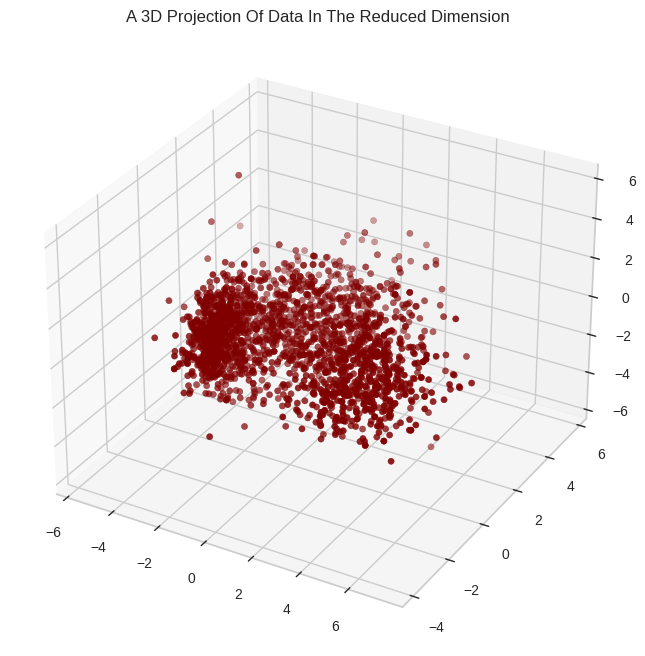

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

## KMeans Clustering

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

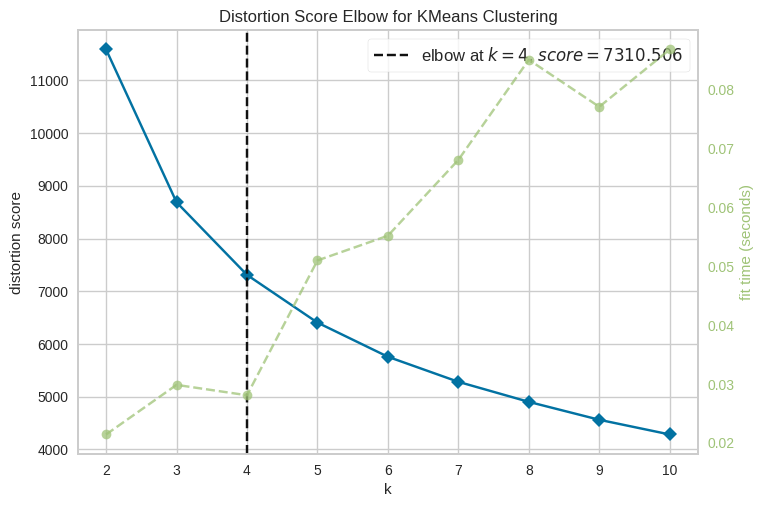

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The optimal number of clusters is 4


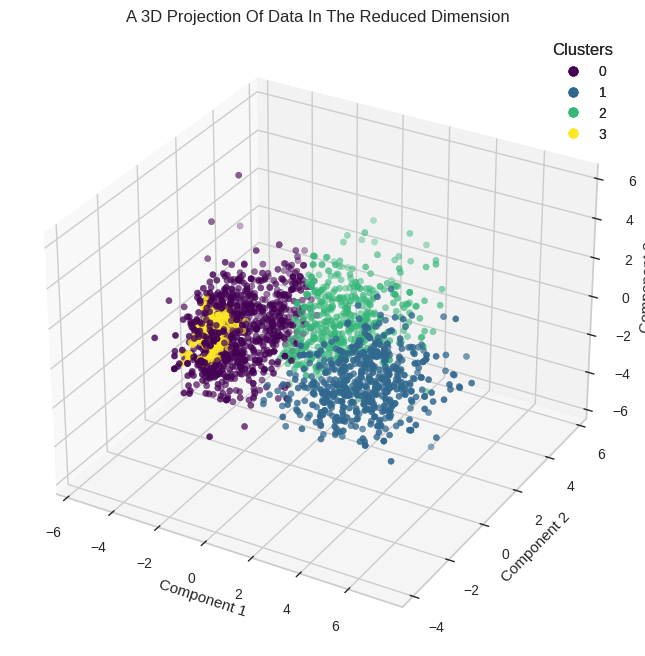

In [ ]:
optimal_clusters = Elbow_M.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters)
k=kmeans.fit_predict(PCA_ds)
cluster_labels = kmeans.labels_
print(f"The optimal number of clusters is {optimal_clusters}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=cluster_labels, marker="o", cmap='viridis')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

### Evauating Model

<ipython-input-250-f4ac94fdd79c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Clusters_k"],palette=['Yellow','Green','Blue','Orange'])


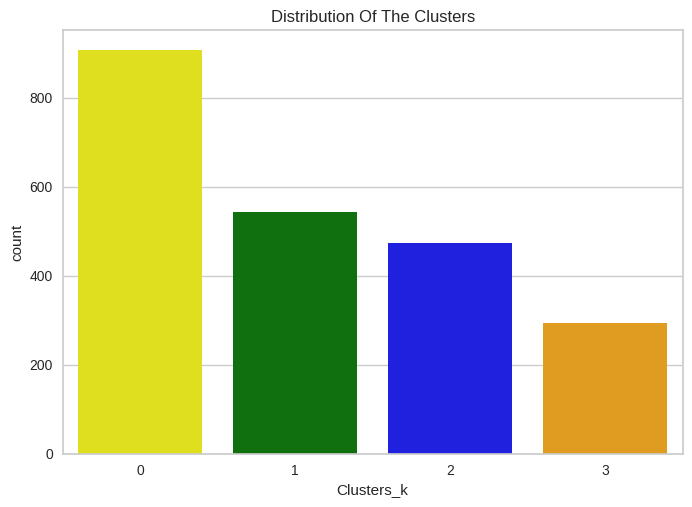

In [ ]:
df["Clusters_k"] = k
PCA_ds["Clusters_k"] = k

sns.countplot(x=df["Clusters_k"],palette=['Yellow','Green','Blue','Orange'])
plt.title("Distribution Of The Clusters")
plt.show()

We have most number of data points in 0th cluster then closely followed by 1st cluster, then 2nd cluster and lastly 3rd cluster.

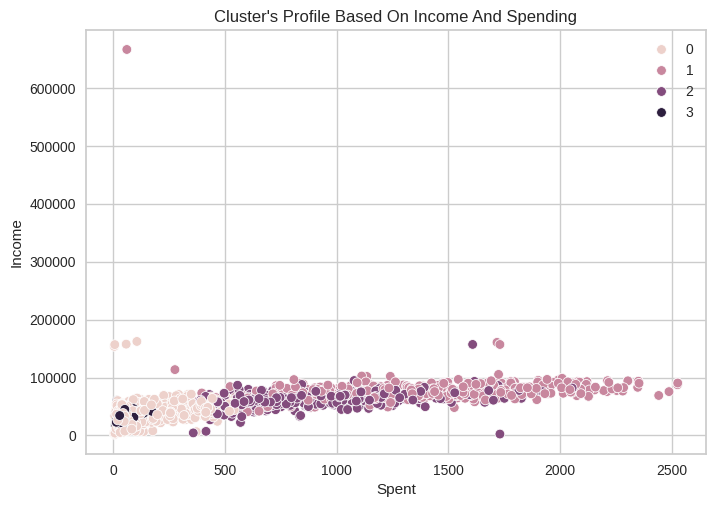

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_k"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

1. group 0: Low spending & low income
2. group 1: high spending & high income
3. group 2: average spending & average income
4. group 3: low spending & average income

<ipython-input-252-0876076d6560>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.swarmplot(x=df["Clusters_k"], y=df["Spent"], palette=['pink','blue','green','red'], alpha=0.5 )
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/li

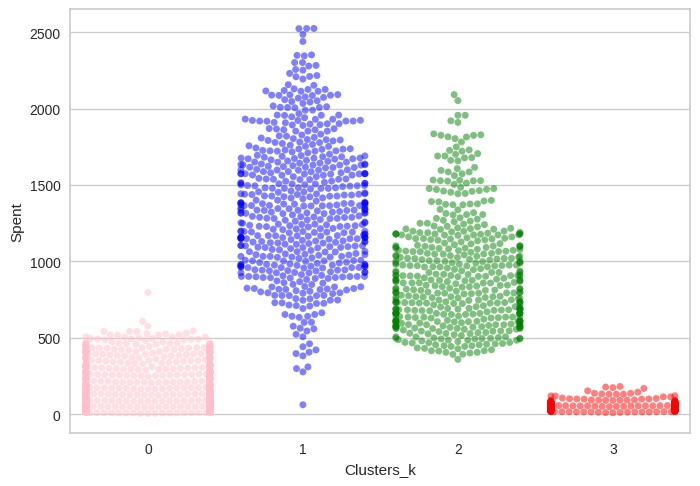

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters_k"], y=df["Spent"], palette=['pink','blue','green','red'], alpha=0.5 )
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 2. We can explore what each cluster is spending on for the targeted marketing strategies.

<ipython-input-255-9100ce5f1119>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_k"], palette=['red','yellow','purple','green'])


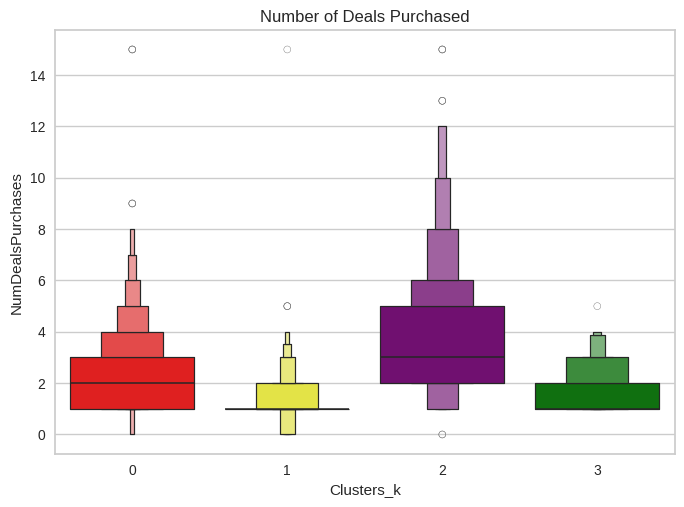

In [ ]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_k"], palette=['red','yellow','purple','green'])
pl.set_title("Number of Deals Purchased")
plt.show()

 It has best outcome with cluster 2. However, our star customers cluster 1 are not much into the deals. Though cluster 0 and 3 customers are attracted.

In [ ]:
silhouette_k = silhouette_score(PCA_ds, k)
print(f"Silhouette Score: {silhouette_k}")

Silhouette Score: 0.414630587639614


Thus the score is not good. The value tells us that data point lies between the overlapping cluster and good cluster.
But Kmeans clustering have some drawbacks such as our dataset has outliers and has may have irregular shape of clusters and also not performing good. Thus we will go to DBSCAN clustering as well.

## DBSCAN Clustering

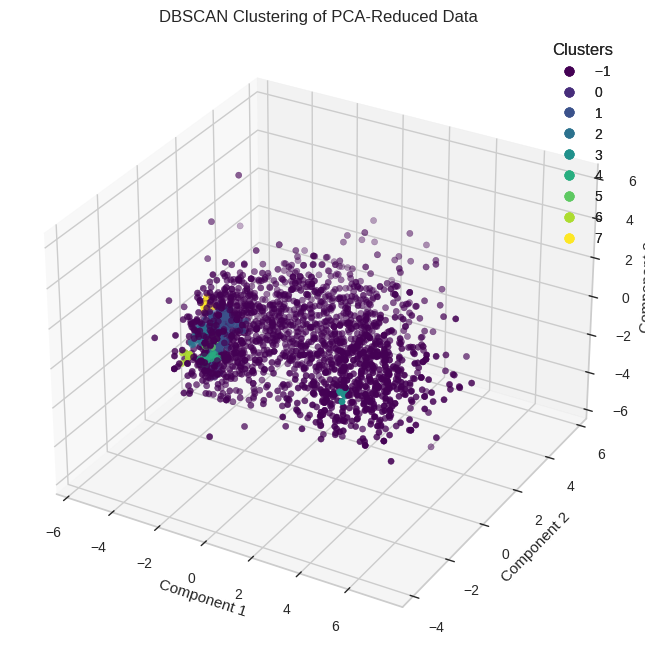

In [ ]:
DP = DBSCAN(eps=0.30, min_samples=9)
DP_df = DP.fit_predict(PCA_ds)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=DP_df, marker="o", cmap='viridis')
ax.set_title("DBSCAN Clustering of PCA-Reduced Data")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

### Evaluating Model

<ipython-input-258-6410859fbbef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters_dp"],palette='Set2')


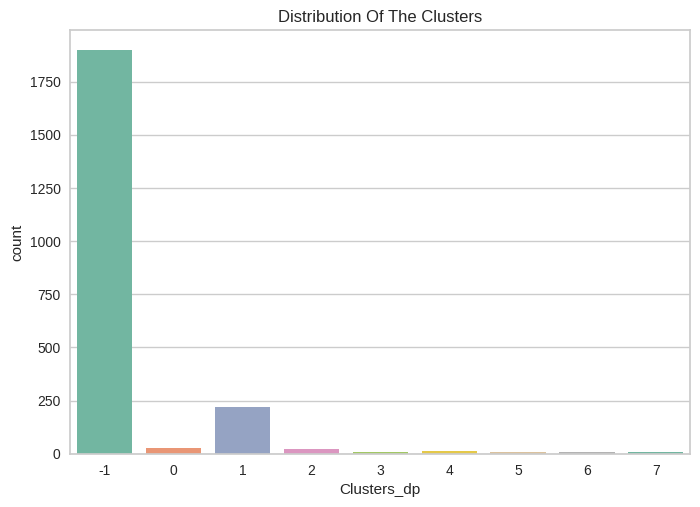

In [ ]:
PCA_ds["Clusters_dp"] = DP_df
df["Clusters_dp"]= DP_df
pl = sns.countplot(x=df["Clusters_dp"],palette='Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

Here -1st cluster has most of the data points and after which 1st cluster has majority data points while other clusters have very few points.

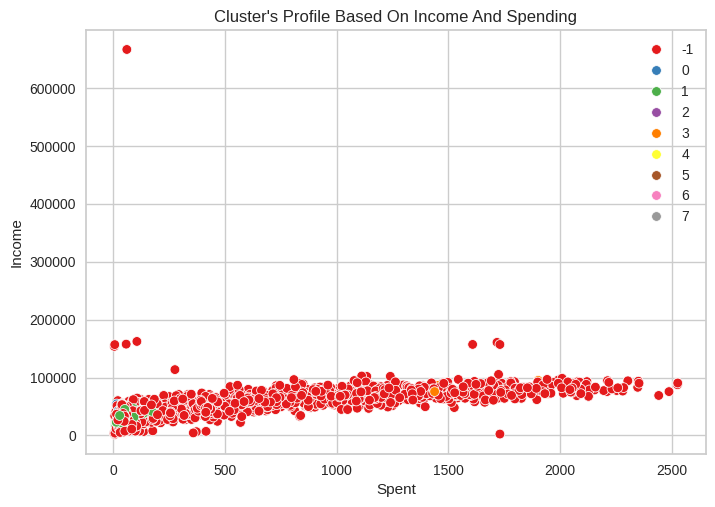

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_dp"],palette='Set1')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

This scatter plot tells us that:
1. Cluster -1 has low to high income with their expenditure minimum to maximum.
2. Cluster 3 has average income and average expenditure.
3. Cluster 1 has average income and low expenditure.
4. While we can not make any inferences about other clusters.

<ipython-input-260-f8bf071160d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.swarmplot(x=df["Clusters_dp"], y=df["Spent"], palette='inferno', alpha=0.5 )
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-p

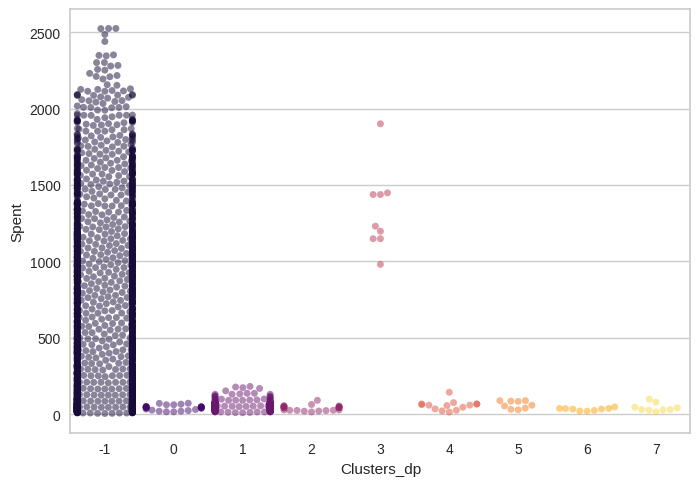

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters_dp"], y=df["Spent"], palette='inferno', alpha=0.5 )
plt.show()

Cluster -1 has most of the data points and has all types of customers spending minimum to maximum while cluster 3 has few data points but those customers spend average income.

<ipython-input-261-2ce6af477134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_dp"], palette=['red','yellow','purple','green'])
<ipython-input-261-2ce6af477134>:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_dp"], palette=['red','yellow','purple','green'])


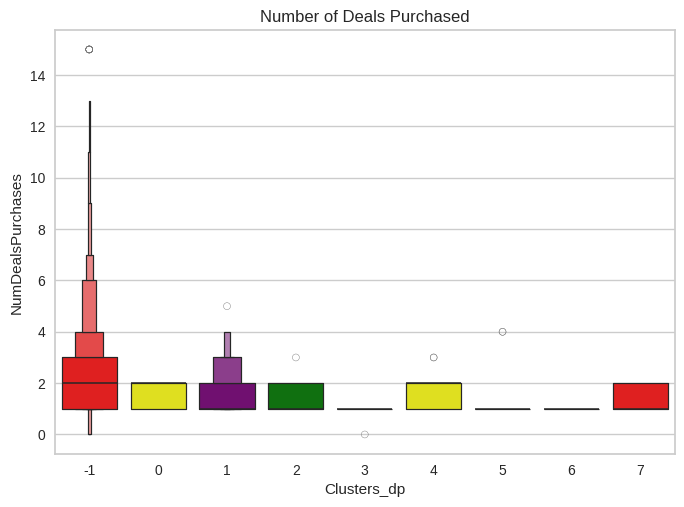

In [ ]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_dp"], palette=['red','yellow','purple','green'])
pl.set_title("Number of Deals Purchased")
plt.show()

Cluster -1 has majority of the data points and makes most of the deal purchases.

In [ ]:
silhouette_db = silhouette_score(PCA_ds, DP_df)
print(f'Silhouette Score: {silhouette_db}')

Silhouette Score: -0.06300598513645277


This metric tells us that the formed clusters are working poor. Thus we can not use this clustering method.

## Hierarchical Clustering

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters_ac"] = yhat_AC
df["Clusters_ac"]= yhat_AC

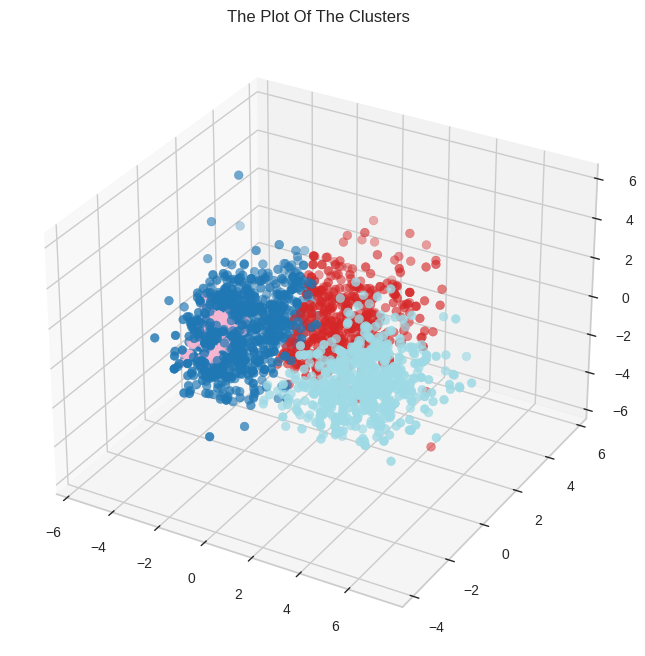

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_ac"], marker='o',cmap='tab20')
ax.set_title("The Plot Of The Clusters")
plt.show()

<ipython-input-265-00a4ba02328d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters_ac"], palette= pal)


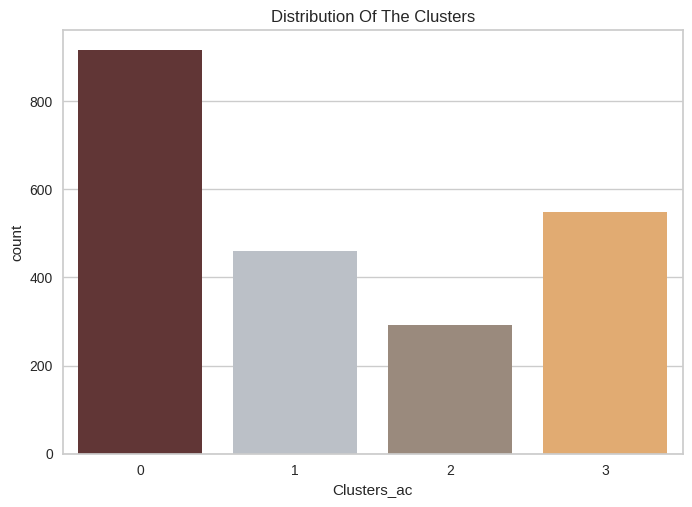

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters_ac"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

There are four clusters formed and arranging clusters in terms of count of data points in descending order is Cluster 0, Cluster 1, Cluster 2, Cluster 3.

### Evaluating model

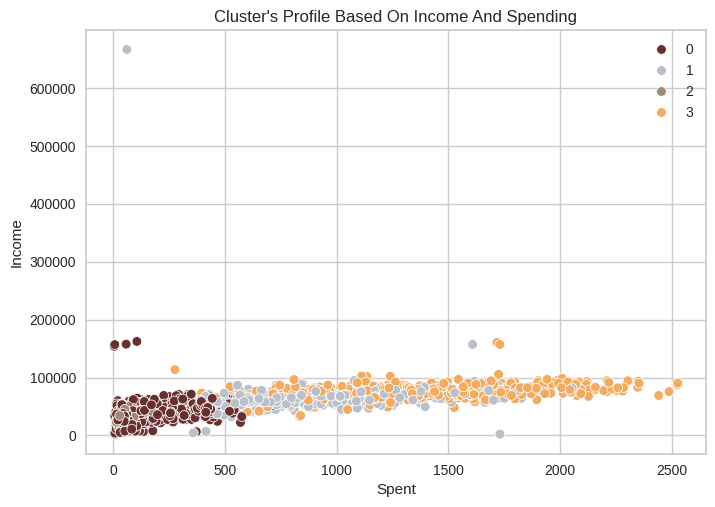

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_ac"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

The above scatter plot tells us that:
1. Cluster 0 has low expenditure and low to high income.
2. Cluster 1 has average expenditure and average income.
3. Cluster 2 has high income and high expenditure.
4. Cluster 3 has average income but low expenditure.

<ipython-input-267-e04b1f52326c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.swarmplot(x=df["Clusters_ac"], y=df["Spent"], palette='cool', alpha=0.5 )
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packa

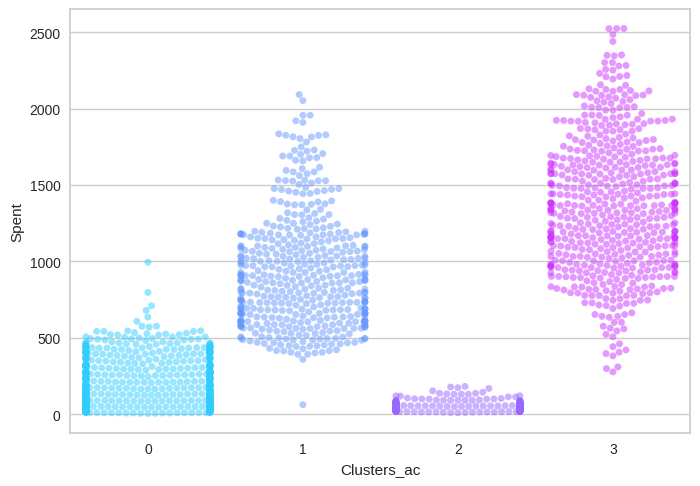

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters_ac"], y=df["Spent"], palette='cool', alpha=0.5 )
plt.show()

Spending behaviour of the customer in descending order is Cluster 2, Cluster 1, Cluster 0, Cluster 3.

<ipython-input-268-ae4ddab3b5f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_ac"], palette=['red','yellow','purple','green'])


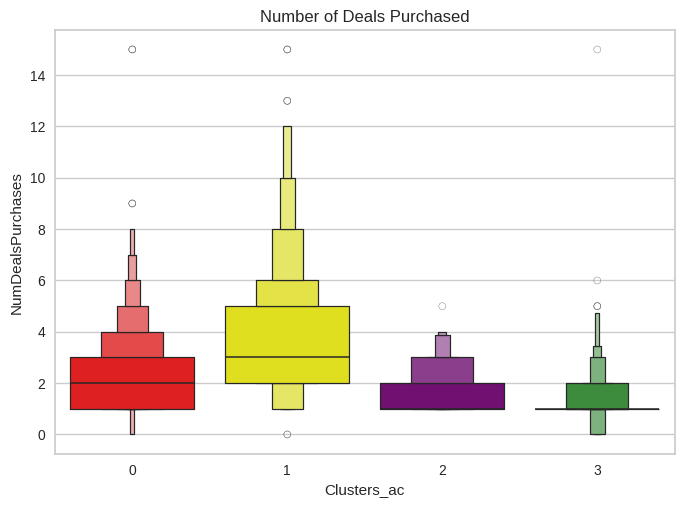

In [ ]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters_ac"], palette=['red','yellow','purple','green'])
pl.set_title("Number of Deals Purchased")
plt.show()

Cluster 2 who is our star customers make less number of deal purchases while Cluster 1 make most of the deal purchases.

In [ ]:
silhouette_ac= silhouette_score(PCA_ds, yhat_AC)
print(f'Silhouette Score: {silhouette_ac}')

Silhouette Score: 0.43706612522057403


# Conclusion

Thus from the various clustering models, we have noted some important points such as:
1. **Kmeans Clustering:**
  
   1. Group 1 customers are spending high with their high income but they are
      less interested in making deal purchases.
   2. Group 2 have average spending but have high income and they made most of the deal purchases.
2. **DBSCAN Clustering:**
   1. Cluster 3 has average income and average expenditure.
   2. Cluster -1 has made most of the deal purchases.
3. **Hierachichal Clustering**
   1. Cluster 1 has average expenditure while Cluster 2 has high expenditure.
   2. Cluster 1 has made most of the deal purchases.
  

In [ ]:
print("Values of Silhouette's metric")
print("Kmeans:",silhouette_k)
print("DBSCAN:",silhouette_db)
print("Hierachichal:",silhouette_ac)
if(silhouette_k>silhouette_db):
  if(silhouette_k>silhouette_ac):
    print("Kmeans clustering method is best.")
if(silhouette_db>silhouette_k):
  if(silhouette_db>silhouette_ac):
    print("DBSCAN clustering method is best.")
if(silhouette_ac>silhouette_k):
  if(silhouette_ac>silhouette_db):
    print("Hierachichal clustering method is best.")

Values of Silhouette's metric
Kmeans: 0.30726936622535644
DBSCAN: -0.03028478067859325
Hierachichal: 0.2982536576216504
Kmeans clustering method is best.


# Profiling

We are using kmeans clusters as it has best value of metric.

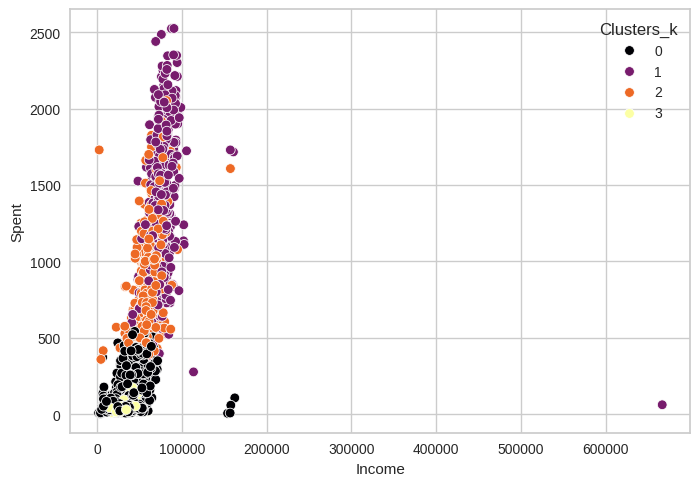

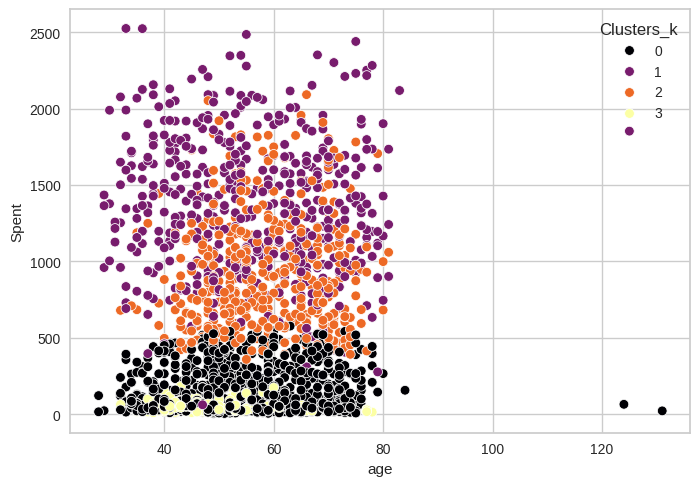

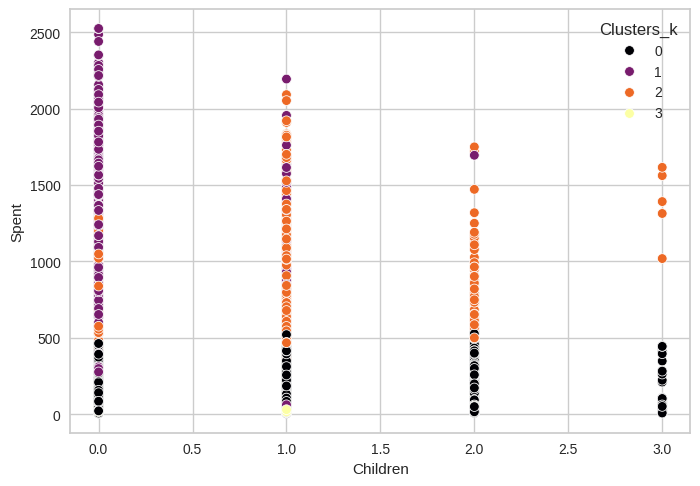

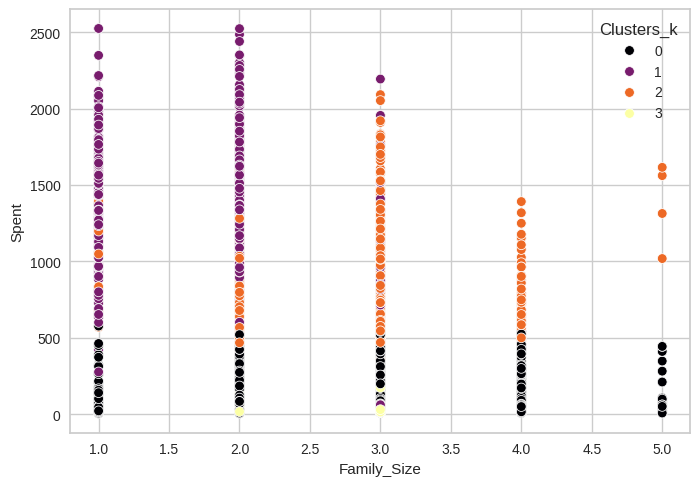

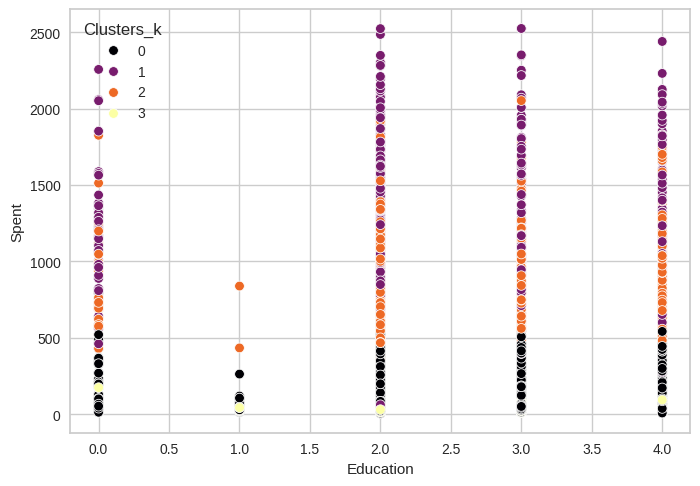

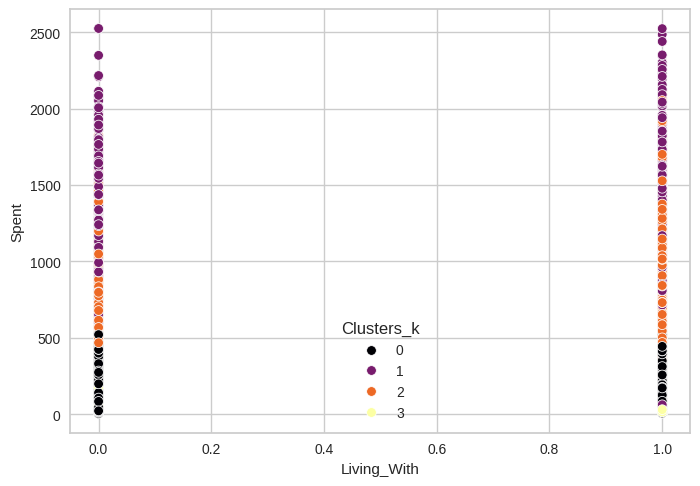

In [ ]:
Personal = [ "Income", "age", "Children", "Family_Size", "Education","Living_With"]
for i in Personal:
    if i in df.columns:
        plt.figure()
        sns.scatterplot(x=df[i], y=df["Spent"], hue =df["Clusters_k"], palette='inferno')
        plt.show()
    else:
        print(f"Column '{i}' not found in DataFrame.")

The above plots reveals important points about the ckusters. So let us know them one by one.
1. **Cluster 0**
   1. Do not have any specific age group
   2. Spends between 0-500 units thus low expenditure
   3. May or may not be a parent
   4. May or may not have a partner
   5. Spans all levels of education
   6. Family size can be from one to five members
   7. Low income group
2. **Cluster 1**
   1. Spans all age group
   2. Spends average to high
   3. Not a parent or may have one children
   4. Family size can be zero, one or max two
   5. Do not have basic level of education
   6. May or may not have the partner.
   7. Very high income group
3. **Cluster 2**
   1. Spans all age group
   2. High density near average expenditure
   3. May or may not be a parent
   4. Family size can be 1-5 members
   5. Spans all level of education
   6. May or may not have a partner
   7. Average income group
4. **Cluster 3**
   1. Spans all age group
   2. Spends less
   3. Will have one child
   4. Family size can have two or three members
   5. Do not have master level of education
   6. Will have a partner
   7. Very low income group




---

Thus after doing market analysis, we can say that we can target cluster 1 and cluster 2 who spends either average or high and spans from all age groups and they may or may not have a partner.